 """Ecommerce shipping prediction is the process of estimating the wheteher the product reached on time. which is  based on various factors such as the origin and destination of the package, the shipping method selected by the customer, the carrier used for shipping, and any potential delays or issues that may arise during the shipping process.
Machine learning models can be used to make accurate predictions about shipping times based on historical data and real-time updates from carriers. These models may take into account factors such as weather conditions, traffic, and other external factors that can impact delivery times.
Over All Ecommerce shipping prediction is an important tool for ecommerce businesses that want to provide accurate delivery estimates to their customers and improve their overall customer experience."""


# Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier as skrfc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV, SGDClassifier, RidgeClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import svm, linear_model
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [4]:
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)


# Loading Data

In [6]:
pwd


'C:\\Users\\nihit\\OneDrive\\Documents\\My_prjct (E-Commerce_shipping_prediction)'

In [7]:
data = pd.read_csv('Train.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Check data

checking data balance using output feature/ dependent variable classes as it is categorical, Data is balanced

In [10]:
#As "ID"column is not necessary we can drop the "ID" column
data.drop("ID",inplace=True,axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [12]:
len(data[data['Reached.on.Time_Y.N']==1]['Reached.on.Time_Y.N'])

6563

In [13]:
len(data[data['Reached.on.Time_Y.N']==0]['Reached.on.Time_Y.N'])

4436

# Data Preparation

## Handling missing values

In [16]:
data.shape

(10999, 11)

In [17]:
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

# Exploratory Data Analysis

In [19]:
#Descriptive statistics
data.describe(include='all')

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


## Visual Analysis

### Univariate Analysis

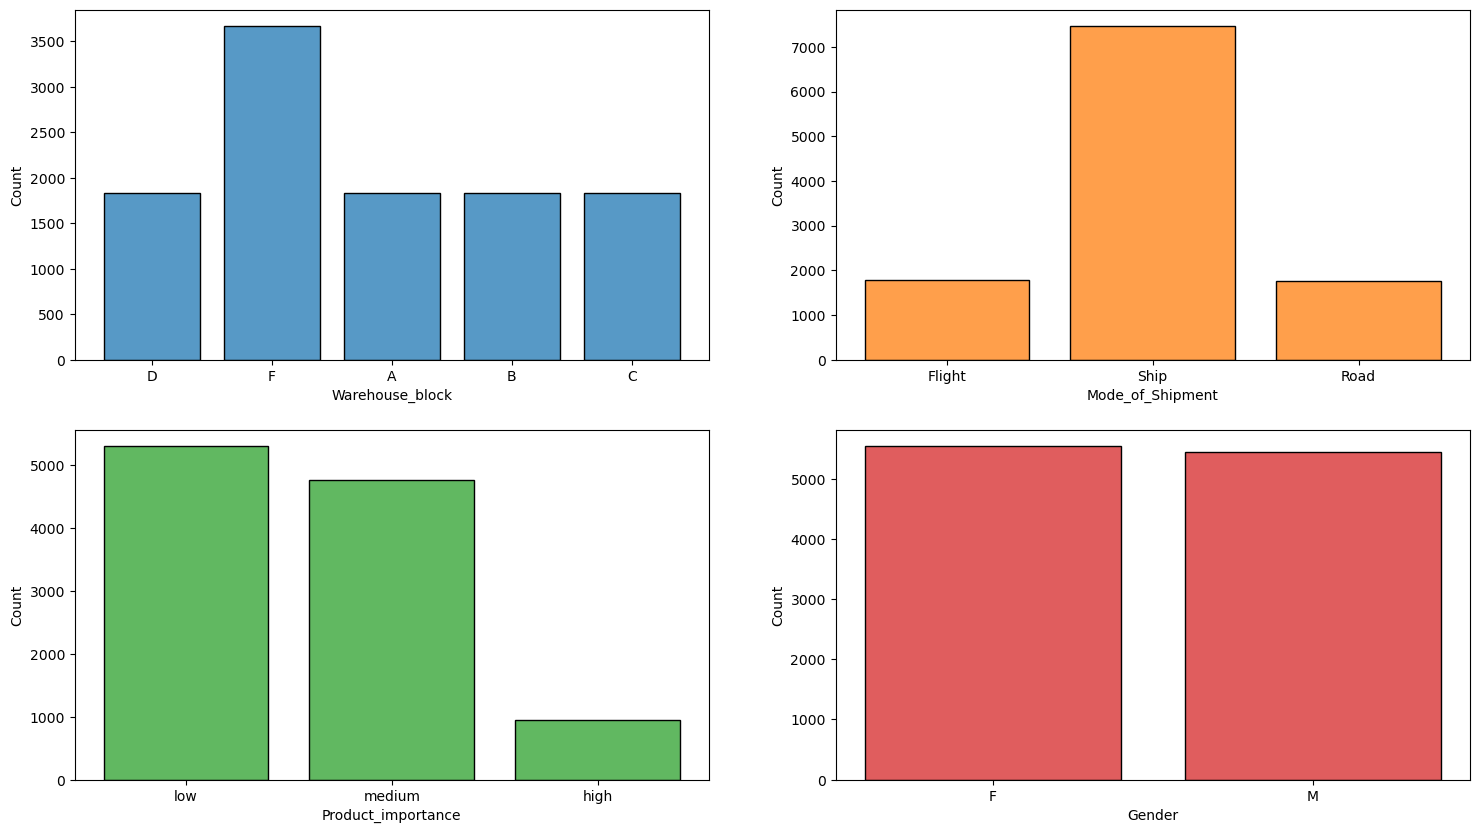

In [22]:
# Display value distributions
plt.figure(figsize=(18, 10))
colors = sns.color_palette()
num_features = data.select_dtypes('object').columns.values

for i, num in enumerate(num_features):

    plt.subplot(2, 2, i+1)
    sns.histplot(data[num],color=colors[i],shrink=0.8)
    
plt.show()

In [23]:
num_features

array(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance',
       'Gender'], dtype=object)

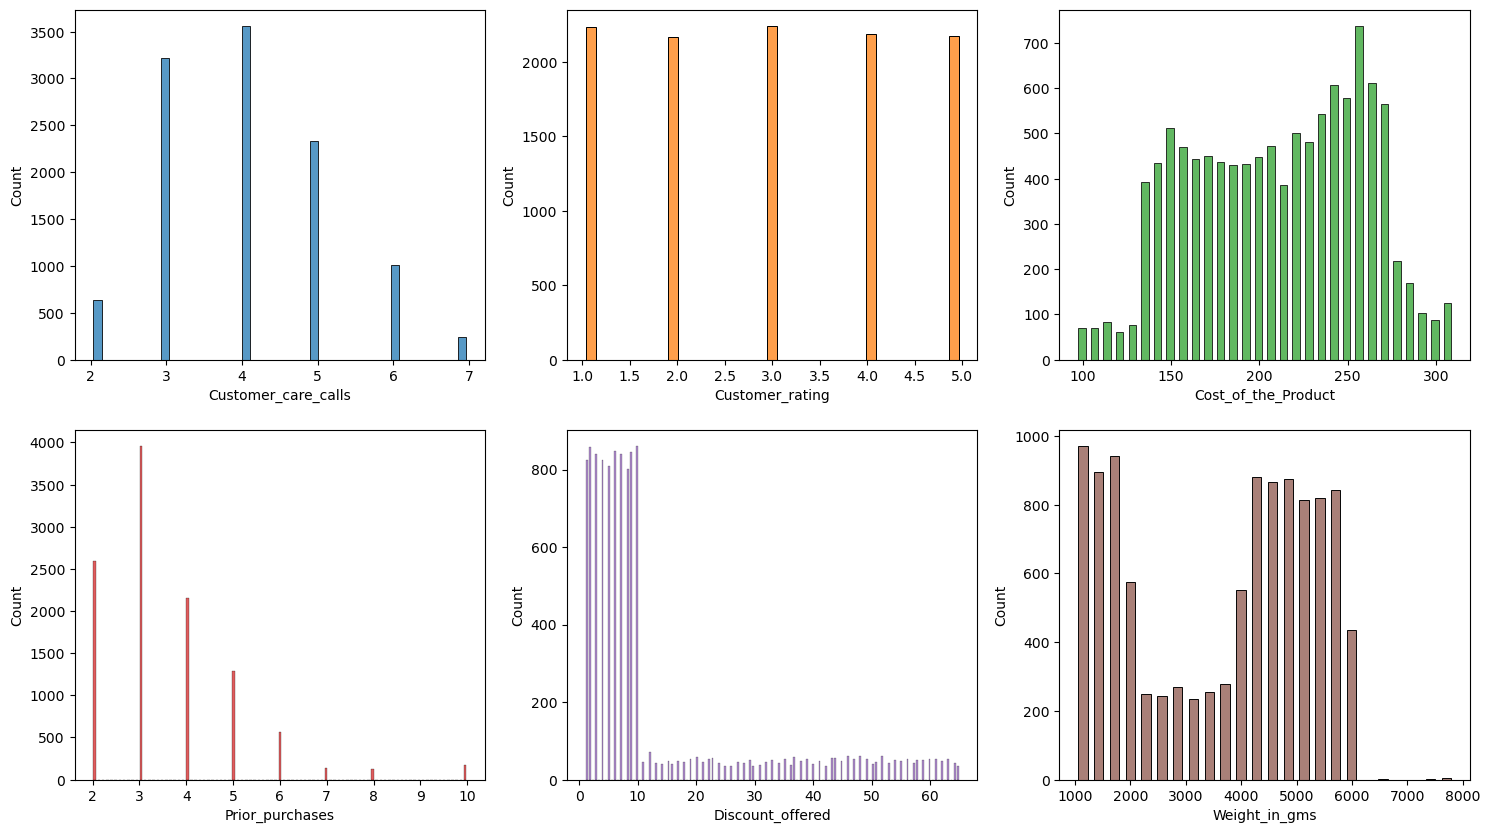

In [24]:
# Display value distributions
plt.figure(figsize=(18, 10))
colors = sns.color_palette()
num_features = data.select_dtypes('number').drop(columns=['Reached.on.Time_Y.N']).columns.values

for i, num in enumerate(num_features):

    plt.subplot(2, 3, i+1)
    sns.histplot(data[num],color=colors[i],shrink=0.6)
    
plt.show()

### Bivariate Analysis

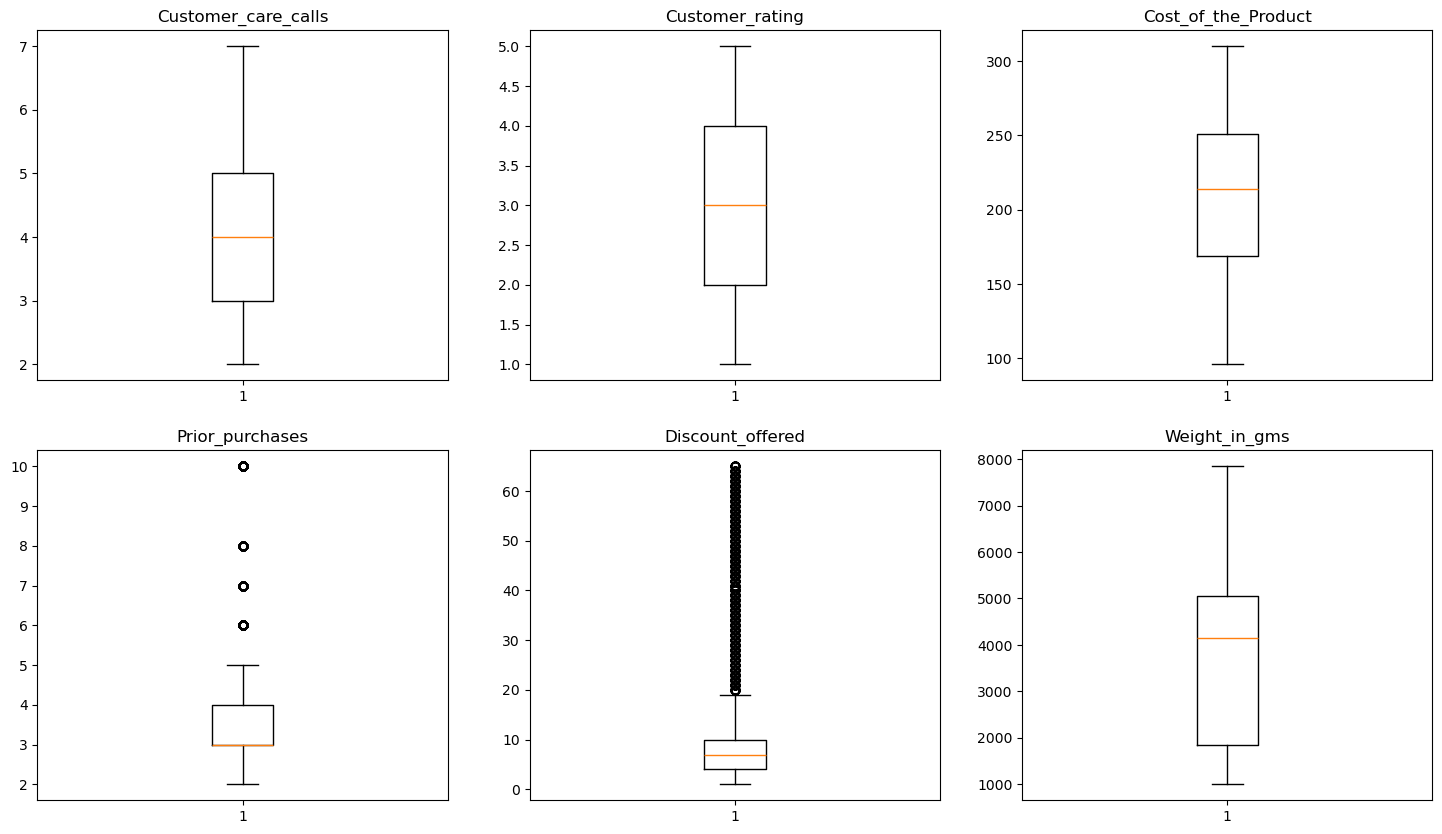

In [26]:
c=0
plt.figure(figsize=(18,10))
for i in data.drop(columns=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Reached.on.Time_Y.N']).columns:
    if str(data[i].dtype)=='object':
        continue
    if c >= 6:
        break
    plt.subplot(2,3,c+1)
    plt.boxplot(data[i])
    plt.title(i)
    c+=1
plt.show()

### Multivariate Analysis

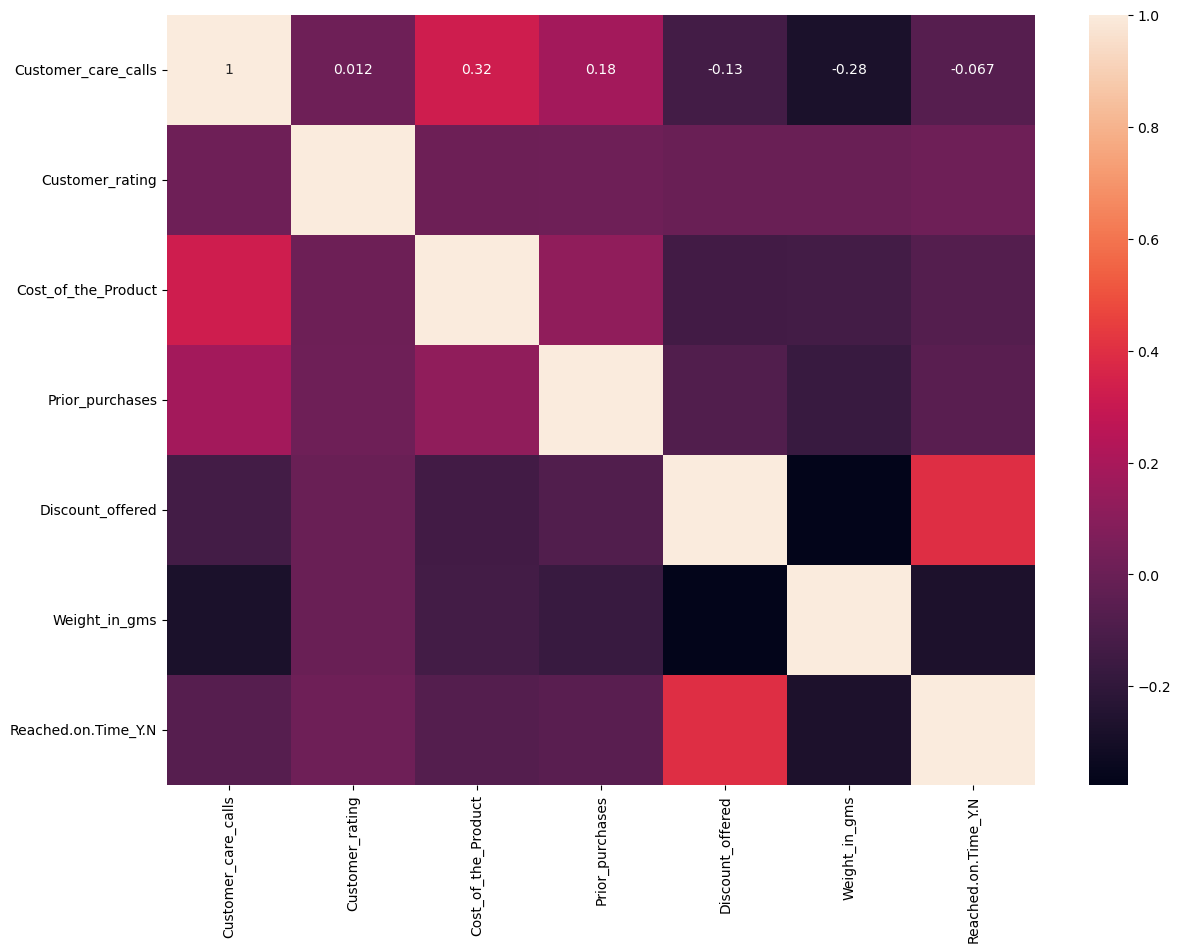

In [28]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14,10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

### Normality

In [30]:
df = data.select_dtypes(include=["float64","int64","int32"])
# for mathematical analysis, to guarantee even though it is not necessary

In [31]:
from scipy.stats import shapiro
for i in df.columns:
    print(i)
    print("---"*5)
    print("%.4f - %.4f" % shapiro(data[i]))
    print("---"*15)

Customer_care_calls
---------------
0.9180 - 0.0000
---------------------------------------------
Customer_rating
---------------
0.8882 - 0.0000
---------------------------------------------
Cost_of_the_Product
---------------
0.9725 - 0.0000
---------------------------------------------
Prior_purchases
---------------
0.8183 - 0.0000
---------------------------------------------
Discount_offered
---------------
0.6889 - 0.0000
---------------------------------------------
Weight_in_gms
---------------
0.8976 - 0.0000
---------------------------------------------
Reached.on.Time_Y.N
---------------
0.6230 - 0.0000
---------------------------------------------


### HOMOGENEITY


In [33]:
from scipy.stats import levene
print("%.4f - %.4f" % levene(data["Cost_of_the_Product"],data["Customer_rating"],
                            data["Discount_offered"],data["Reached.on.Time_Y.N"]))

19674.4067 - 0.0000


In [34]:
print("%.4f - %.4f" % levene(data["Cost_of_the_Product"],data["Reached.on.Time_Y.N"]))

29871.8239 - 0.0000


In [35]:
print("%.4f - %.4f" % levene(data["Customer_rating"],data["Reached.on.Time_Y.N"]))

8596.2919 - 0.0000


In [36]:
print("%.4f - %.4f" % levene(data["Discount_offered"],data["Reached.on.Time_Y.N"]))

4351.4195 - 0.0000


## Handling catogorical values(Encoding)

In [38]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
objectcolumns = data.select_dtypes(include=["object"])
print(objectcolumns.columns)


Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')


In [39]:
for a in objectcolumns:
    data[a] = encode.fit_transform(data[a])

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int32
 1   Mode_of_Shipment     10999 non-null  int32
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int32
 7   Gender               10999 non-null  int32
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int32(4), int64(7)
memory usage: 773.5 KB


In [41]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1


# handling and Checking for outliers

In [43]:
def check_outliers(arr):
    Q1 = np.percentile(arr, 25,interpolation = 'midpoint')
    Q3 = np.percentile(arr, 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    #Above Upper bound
    upper=Q3+1.5*IQR
    upper_array=np.array(arr>=upper)
    print(' '*3,len(upper_array[upper_array == True]),'are over the upper bound:',upper)

    #Below Lower bound
    lower=Q1-1.5*IQR
    lower_array=np.array(arr<=lower)
    print(' '*3,len(lower_array[lower_array == True]),'are less than the lower bound:',lower,'\n')
#checking initial number of rows
initial_rows=data.shape[0]
print(f"Initial number of rows: {initial_rows}")
for i in data.drop(columns=[
                            'Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Reached.on.Time_Y.N']).columns:
    if str(data[i].dtype)=='object':
        continue
    print(i)
    check_outliers(data[i])

Initial number of rows: 10999
Customer_care_calls
    0 are over the upper bound: 8.0
    0 are less than the lower bound: 0.0 

Customer_rating
    0 are over the upper bound: 7.0
    0 are less than the lower bound: -1.0 

Cost_of_the_Product
    0 are over the upper bound: 374.0
    0 are less than the lower bound: 46.0 

Prior_purchases
    1003 are over the upper bound: 5.5
    0 are less than the lower bound: 1.5 

Discount_offered
    2262 are over the upper bound: 19.0
    0 are less than the lower bound: -5.0 

Weight_in_gms
    0 are over the upper bound: 9865.75
    0 are less than the lower bound: -2976.25 



In [44]:
from sklearn.neighbors import LocalOutlierFactor
DataForA = data.copy()
# to protect main
clf = LocalOutlierFactor()
clf.fit_predict(DataForA)
score = clf.negative_outlier_factor_
scoreSorted = np.sort(score)
print(scoreSorted[0:50])
# checking outlier, look where the biggest jump took place
# we can identify 6.index as point
point = scoreSorted[6]
print(point)
print("---"*10)
print(DataForA[score == point])

[-49.23420001 -45.83305039 -44.90793785 -43.80881891 -39.87437401
 -23.44503825  -4.7196879   -3.42435176  -3.37610349  -3.20090154
  -3.06223813  -2.86920018  -2.78754054  -2.74031948  -2.5840874
  -2.53241128  -2.51965873  -2.49954423  -2.45206587  -2.22651546
  -2.19794237  -2.14941097  -2.08814005  -2.07886447  -2.05597358
  -2.04178282  -1.85543019  -1.81595265  -1.79030482  -1.78492262
  -1.78367328  -1.78196285  -1.74562079  -1.72837548  -1.71070166
  -1.70775564  -1.69162048  -1.68935852  -1.68902088  -1.68238855
  -1.67774099  -1.66262386  -1.63914729  -1.63399915  -1.63292157
  -1.63241874  -1.62371866  -1.62080133  -1.61929576  -1.61737996]
-4.7196878981741435
------------------------------
     Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
251                4                 1                    2                2   

     Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
251                  145                3              

In [45]:
outliers = score < point
print(data[outliers])
print("---"*20)
print(data[outliers].index)

     Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
198                3                 2                    2                3   
199                4                 2                    2                2   
205                4                 2                    2                3   
213                1                 2                    2                5   
245                4                 2                    2                4   
257                4                 1                    2                2   

     Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
198                  142                3                   2       0   
199                  154                3                   2       1   
205                  145                3                   2       0   
213                  160                3                   2       0   
245                  154                3                   2       0   
2

In [46]:
#Deleting
outliersIndexList = [data[outliers].index]
print(type(outliersIndexList))

<class 'list'>


In [47]:
for d in outliersIndexList:
    data.drop(index=d,inplace=True)

In [48]:
data.shape

(10993, 11)

# Standardization

In [50]:
import statsmodels.stats.api as sms

In [51]:
#for Customer_rating
print(data["Customer_rating"].mode())
print(data["Customer_rating"].max())
print(data["Customer_rating"].min())
print(data["Customer_rating"].mean())
print(sms.DescrStatsW(data["Customer_rating"]).tconfint_mean())

0    3
Name: Customer_rating, dtype: int64
5
1
2.990448467206404
(2.9640174157017847, 3.0168795187110233)


In [52]:
def func(x):
    if x < 2.99:
        return "BAD"
    else:
        return "GOOD"

In [53]:
data["Customer_rating"] = data["Customer_rating"].apply(lambda x: func(x))

In [54]:
print(data["Customer_rating"].value_counts())

Customer_rating
GOOD    6595
BAD     4398
Name: count, dtype: int64


In [55]:
data["Customer_rating"] = encode.fit_transform(data["Customer_rating"])

In [56]:
print(data["Customer_rating"].value_counts())

Customer_rating
1    6595
0    4398
Name: count, dtype: int64


In [57]:
#for Discount_offered
print(data["Discount_offered"].mode())
print(data["Discount_offered"].max())
print(data["Discount_offered"].min())
print(data["Discount_offered"].mean())
print(sms.DescrStatsW(data["Discount_offered"]).tconfint_mean())

0    10
Name: Discount_offered, dtype: int64
65
1
13.362230510324752
(13.059329677044607, 13.665131343604896)


In [58]:
def funcforD(x):
    if x < 13.36:
        return "LESS"
    elif 13.36 < x > 30:
        return "NORMAL"
    else:
        return "TOO MUCH"

In [59]:
data["Discount_offered"] = data["Discount_offered"].apply(lambda x: funcforD(x))

In [60]:
print(data["Discount_offered"].value_counts())

Discount_offered
LESS        8514
NORMAL      1706
TOO MUCH     773
Name: count, dtype: int64


In [61]:
data["Discount_offered"] = encode.fit_transform(data["Discount_offered"])

In [62]:
print(data["Discount_offered"].value_counts())

Discount_offered
0    8514
1    1706
2     773
Name: count, dtype: int64


## Splitting the data into Train and Test

In [64]:
x = data.drop(["Reached.on.Time_Y.N"],axis=1)
y = data["Reached.on.Time_Y.N"]

In [65]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
print(xTrain.columns)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [67]:
print(yTrain)

5855    1
4714    1
8683    1
298     1
3463    1
       ..
5740    1
5197    0
5396    0
866     1
7276    1
Name: Reached.on.Time_Y.N, Length: 8794, dtype: int64


In [68]:
print(xTest.columns)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [69]:
print(yTest)

107      1
5484     0
8445     1
10061    0
5665     1
        ..
10548    1
5809     0
7488     1
4632     0
5937     0
Name: Reached.on.Time_Y.N, Length: 2199, dtype: int64


# Training and evaluating models

In [71]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knnc = KNeighborsClassifier().fit(xTrain,yTrain)
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain,yTrain)
xgbc = XGBClassifier().fit(xTrain,yTrain)
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)

In [72]:
modelsc = [lj,gnb,knnc,cartc,rfc,gbmc,xgbc,catbc]

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    roc = roc_curve(yTest,predict)
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(yTest,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("ROC-->",roc)
    print("-" * 30)

LogisticRegression: 
----------
ACC--> 0.6762164620281946
R2CV--> 0.6780282274802822
MEAN SQUARED ERROR--> 0.5674255656204765
ROC--> (array([0.        , 0.33369923, 1.        ]), array([0.        , 0.68322981, 1.        ]), array([2, 1, 0], dtype=int64))
------------------------------
GaussianNB: 
----------
ACC--> 0.6384720327421555
R2CV--> 0.6384786218347861
MEAN SQUARED ERROR--> 0.6012664784978569
ROC--> (array([0., 0., 1.]), array([0.        , 0.38276398, 1.        ]), array([2, 1, 0], dtype=int64))
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.6703046839472487
R2CV--> 0.6634744707347446
MEAN SQUARED ERROR--> 0.5801082047904988
ROC--> (array([0.        , 0.36772777, 1.        ]), array([0.        , 0.69720497, 1.        ]), array([2, 1, 0], dtype=int64))
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.647112323783538
R2CV--> 0.6512079701120796
MEAN SQUARED ERROR--> 0.5905861748194926
ROC--> (array([0.        , 0.46652031, 1.  

In [74]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
def eval(name,model):
    y_pred=model.predict(xTest)
    result=[]
    result.append(name)
    result.append("{:.2f}".format(accuracy_score(yTest,y_pred)*100))
    result.append("{:.2f}".format(f1_score(yTest,y_pred)*100))
    result.append("{:.2f}".format(recall_score(yTest,y_pred)*100))
    result.append("{:.2f}".format(precision_score(yTest,y_pred)*100))
    return result

In [75]:
print("Model Evaluation before Hyper Parameter Tuning")
model_list={
    'logistic regression':lj,
    'GaussianNB':gnb,
    'KNeighborsClassifier':knnc,
    'DecisionTreeClassifier':cartc,
    'RandomForestClassifier':rfc,
    'GradientBoostingClassifier':gbmc,
    'XGBClassifier':xgbc,
    'CatBoostClassifier':catbc
}
model_eval_info=[]
for i in model_list.keys():
    model_eval_info.append(eval(i,model_list[i]))
model_eval_info=pd.DataFrame(model_eval_info,columns=['Name','Accuracy','f1_score','Recall','Precision'])
model_eval_info.to_csv('model_eval.csv')
model_eval_info

Model Evaluation before Hyper Parameter Tuning


,Name,Accuracy,f1_score,Recall,Precision
0,logistic regression,67.62,71.20,68.32,74.32
1,GaussianNB,63.85,55.36,38.28,100.00
2,KNeighborsClassifier,67.03,71.24,69.72,72.83
3,DecisionTreeClassifier,64.71,70.72,72.75,68.80
4,RandomForestClassifier,67.44,70.61,66.77,74.91
5,GradientBoostingClassifier,69.99,68.96,56.91,87.47
6,XGBClassifier,66.89,70.33,67.00,74.01
7,CatBoostClassifier,68.26,70.09,63.51,78.20


In [76]:
from sklearn.model_selection import GridSearchCV
param_grids = {
    'LogisticRegression': {
        'solver': ['liblinear', 'lbfgs'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    'GaussianNB': {
        'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance']
    },
    'DecisionTreeClassifier': {
        'max_depth': [3, 5, 7, 9, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 9, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7, 9]
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7, 9]
    },
    'CatBoostClassifier': {
        'iterations': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.05],
        'depth': [3, 5, 7, 9]
    }
}


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score

best_models = {}
for model_name, model in zip(['LogisticRegression', 'GaussianNB', 'KNeighborsClassifier', 'DecisionTreeClassifier', 
                              'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'CatBoostClassifier'], modelsc):
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(xTrain, yTrain)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy for {model_name}: {grid_search.best_score_}")

Optimizing LogisticRegression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validated accuracy for LogisticRegression: 0.6498758538082385
Optimizing GaussianNB...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for GaussianNB: {'var_smoothing': 1e-07}
Best cross-validated accuracy for GaussianNB: 0.6506715665444931
Optimizing KNeighborsClassifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNeighborsClassifier: {'n_neighbors': 11, 'weights': 'distance'}
Best cross-validated accuracy for KNeighborsClassifier: 0.6557889508272424
Optimizing DecisionTreeClassifier...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validated accuracy for DecisionTreeClassifier: 0.6806925022685218
Optimizing R

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve

for name, model in best_models.items():
    predict = model.predict(xTest)
    R2CV = cross_val_score(model, xTest, yTest, cv=10).mean()
    error = -cross_val_score(model, xTest, yTest, cv=10, scoring="neg_mean_squared_error").mean()
    roc = roc_curve(yTest, predict)
    print(name + ": ")
    print("-" * 10)
    print("ACC-->", accuracy_score(yTest, predict))
    print("R2CV-->", R2CV)
    print("MEAN SQUARED ERROR-->", np.sqrt(error))
    print("ROC-->", roc)
    print("-" * 30)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
def eval(name,model):
    y_pred=model.predict(xTest)
    result=[]
    result.append(name)
    result.append("{:.2f}".format(accuracy_score(yTest,y_pred)*100))
    result.append("{:.2f}".format(f1_score(yTest,y_pred)*100))
    result.append("{:.2f}".format(recall_score(yTest,y_pred)*100))
    result.append("{:.2f}".format(precision_score(yTest,y_pred)*100))
    return result

In [ ]:
print("Model Evaluation after Hyper Parameter Tuning")
model_list={
    'LogisticRegression': best_models['LogisticRegression'],
    'GaussianNB': best_models['GaussianNB'],
    'KNeighborsClassifier': best_models['KNeighborsClassifier'],
    'DecisionTreeClassifier': best_models['DecisionTreeClassifier'],
    'RandomForestClassifier': best_models['RandomForestClassifier'],
    'GradientBoostingClassifier': best_models['GradientBoostingClassifier'],
    'XGBClassifier': best_models['XGBClassifier'],
    'CatBoostClassifier': best_models['CatBoostClassifier']
}
model_eval_info=[]
for i in model_list.keys():
    model_eval_info.append(eval(i,model_list[i]))
model_eval_info=pd.DataFrame(model_eval_info,columns=['Name','Accuracy','f1_score','Recall','Precision'])
model_eval_info.to_csv('model_eval.csv')
model_eval_info

In [ ]:
model_list.keys()

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('model_eval.csv')
df

In [ ]:

import matplotlib.pyplot as plt


for i in df.columns[2:]:
    plt.figure(figsize=(20, 12))
    plt.title(i,fontsize=20)
    b=sns.barplot(y='Name',x=i,data=df,order=df.sort_values(i,ascending = False).Name)
    b.tick_params(labelsize=20)
    b.bar_label(b.containers[0])
    plt.show()

In [ ]:
for i in xTest[:10]:
    prob=model.predict_proba(i.reshape(1,-1))[0]
    n_reach = prob[0]
    reach = prob[1]
    print(reach,n_reach)
    print('There is a {0:.2f} % chance that your product will reach in time and {0:.2f} % chance that your product will not reach in time'.format(reach*100,n_reach*100))
    
    print(model.predict(i.reshape(1,-1)))

# Saving model

In [ ]:
import pickle as pkl

In [ ]:
pkl.dump(xgbc, open('XGBoo_70.pkl', 'wb'))

In [ ]:
# Load the model
model_path = 'XGBoo_70.pkl'
with open(model_path, 'rb') as file:
    xgbc = pkl.load(file)